<a href="https://colab.research.google.com/github/pa-shk/postcard_project/blob/main/post_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
import os

SEED = 42

In [ ]:
drive.mount(r"/content/drive/")
WORKING_DIRECTORY = r"/content/drive/MyDrive/postcards_project"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv(os.path.join(WORKING_DIRECTORY, 
                              os.path.join(
                                  WORKING_DIRECTORY,
                                  r"[2023.03.27] Пишу тебе. Корпус (база 1-4) - [2023.03.27] Пишу тебе. Корпус (база 1-4).csv"
                                   )
                              ))

# Preprocessing

In [ ]:
df.shape

(16952, 33)

In [ ]:
df['Текст открытки'].isna().sum()

16

In [ ]:
df = df[df['Текст открытки'].notna()]

In [ ]:
(df['Текст открытки']  == '[отсутствует]').sum()

116

In [ ]:
df = df[df['Текст открытки'] != '[отсутствует]']

In [ ]:
df['Текст открытки'].str.len().max()

2311

In [ ]:
df['Текст открытки'][df['Текст открытки'].str.len() < 10]

10            А.М.
1990     На память
2303      1902 год
2317        Здравс
2397          Оса.
5156            Щг
5608        [нрзб]
6671     {?Катяск}
7716      {[нрзб]}
8170     {Дорогим}
8840     Е. Мысова
9010        {1909}
9781      В. Лодко
10595    <подпись>
10982     Печатное
14266     {[нрзб]}
15641    {Местное}
15650       Стенка
16140    Печатное.
16141    <подпись>
16143    {от Вани}
16150         Соня
16363       [нрзб]
16458     Печатное
Name: Текст открытки, dtype: object

In [ ]:
pd.DataFrame(df['Текст открытки'])

,Текст открытки
0,"{Милый Жоржик! Простите, голубчик, за молчание..."
1,Добрейший Паша! Будь добр вышли мне на консерв...
2,Милая моя Олечка! Открытку твою получила. Спас...
3,Odessa. 30. 7. 01. Herzliche Grüße von [?M.Cho...
5,Ст. Челябинск \n18/IV \nХристос Воскресе! От д...
...,...
16947,С днем Ангела поздравляю Вас дорогая Софья Мих...
16948,"{9 апреля 1905 г. Поклон от остальных}""Горячий..."
16949,Христос Воскресе! Люб[ящий] вас Антонович
16950,"Екатерину Васильевну, Катю и Екатерину поздрав..."


In [ ]:
cat = df.loc[:, 'Тег_1': 'Тег_7'].apply(lambda x: x.value_counts()).sum(axis=1)
pd.DataFrame(cat)

,0
\n,1.0
1 мая,2.0
1 сентября,6.0
[? Социальное],1.0
[?Репродукции картин],1.0
...,...
прочие праздники,187.0
прочие религиозные праздники,127.0
прочие советские праздники,174.0
рождество,651.0


In [ ]:
(cat < 5).sum()

29

In [ ]:
df.loc[:, 'Тег_1': 'Тег_7'] = df.loc[:, 'Тег_1': 'Тег_7'].astype(str).apply(lambda x: x.str.lower())

In [ ]:
cat = df.loc[:, 'Тег_1': 'Тег_7'].apply(lambda x: x.value_counts()).sum(axis=1)
pd.DataFrame(cat)

,0
\n,1.0
1 мая,2.0
1 сентября,6.0
[? социальное],1.0
[?репродукции картин],1.0
...,...
уведомление о приезде,1.0
учеба,624.0
учёба,1.0
фронтовая,184.0


In [ ]:
labels_to_inspect = ['[?шлю привет]', 'новы', 'др', 'дет']
df[df.loc[:, 'Тег_1': 'Тег_7'].apply(lambda x: x.isin(labels_to_inspect)).any(axis=1)]

,Номер открытки,Лицевая сторона - ссылка,Оборотная сторона - ссылка,Язык текста открытки,Текст открытки,Перевод текста открытки (если на иностранном языке),Вид орфографии,"Дата написания текста (если автор указал явно, не штемпели)",Адрес отправителя,Имя отправителя,...,Населенный пункт (откуда),Страна (куда),Населенный пункт (куда),Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7
6387,205636,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,{от <подпись> 7 Июня 03г.},NaN,"Дореволюционная (ъ,ѣ и т.д.)",07.06.1903,Псков,[нрзб.],...,"Псковская губерния, Псковский уезд, город Псков",Российская Империя,"Симбирская губерния, Ардатовский уезд, село Ме...",[?шлю привет],загадочная открытка,nan,nan,nan,nan,nan
9628,209391,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,{06.03.1916} Здравствуйте миленькая наша мамоч...,NaN,"Дореволюционная (ъ,ѣ и т.д.)",06.03.1916,Москва,[?Марья] да Иван,...,"Московская губерния, Московский уезд, Москва",Российская Империя,"Казанская губерния, Казань",житейское,новости,письма маме,письма семье,nan,nan,др
12701,217175,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Милая Манька! Поздраляю Вас и всех ваших с нас...,NaN,Современная,[отсутствует],Харьков-51 Штурмовая 34 кв 13,[?Янковская] Л. И.,...,"УССР, г. Харьков",СССР,"РСФСР, Тамбовская область, г. Мичуринск",поздравление в тексте,поздравление на картинке,новы,шлю привет,поцелуи из писем,житейское,nan
13392,216820,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,"Дорогие Надя, Слава и Ваши дети, здравствуйте!...",NaN,Современная,[отсутствует],"г. Ульяновск, ул. 40 лет октября 31-38",Фролова Надежда С.,...,"РСФСР, Ульяновская область, город Ульяновск",СССР,"РСФСР, Волгоградская область, город Волжский",поздравление в тексте,поздравление на картинке,октябрьская революция,шлю привет,nan,дет,nan


In [ ]:
labels_to_replace = {
    'долго не пишите': 'почему долго не писал?',
    '1 мая': 'первое мая',
    'новы': 'новый год',
    'учёба': 'учеба',
    'дет': 'написано о детях'
    }

In [ ]:
df.replace(labels_to_replace, inplace=True)

In [ ]:
cat = df.loc[:, 'Тег_1': 'Тег_7'].apply(lambda x: x.value_counts()).sum(axis=1)
cat.nlargest(30)

nan                         55167.0
поздравление в тексте       10208.0
поздравление на картинке     5969.0
житейское                    5720.0
поцелуи из писем             3816.0
шлю привет                   3809.0
новый год                    3465.0
новости                      2891.0
поездка                      2062.0
письма семье                 1606.0
письма от семьи              1584.0
из путешествия               1228.0
пасха                        1187.0
именины                      1027.0
просьба                      1013.0
восьмое марта                 998.0
дети на картинке              871.0
первое мая                    814.0
октябрьская революция         777.0
благодарность в тексте        689.0
в пути                        668.0
рождество                     654.0
учеба                         625.0
социальное                    587.0
день рождения                 531.0
погода                        524.0
репродукции картин            485.0
приглашение в тексте        

In [ ]:
cat = df.loc[:, 'Тег_1': 'Тег_7'].apply(lambda x: x.value_counts()).sum(axis=1)

In [ ]:
labels_list = list(cat.nlargest(30).keys())
labels_to_remove = ['репродукции картин', 'nan', 'дети на картинке', 'поздравление на картинке', 'изображения животных']
labels_list = [i for i in labels_list if i not in labels_to_remove]

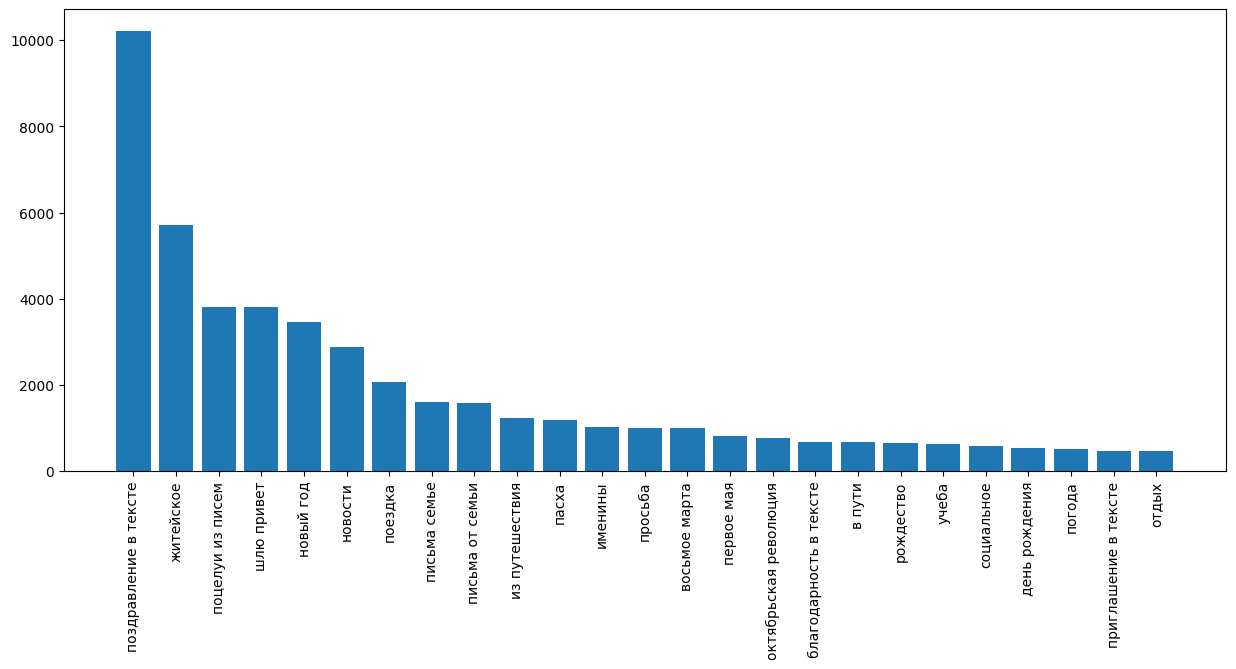

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 6))


ax = plt.bar(cat.nlargest(30)[~cat.nlargest(30).keys().isin(labels_to_remove)].keys(), 
             height=cat.nlargest(30)[~cat.nlargest(30).keys().isin(labels_to_remove)].values)

plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit([labels_list])

MultiLabelBinarizer()

In [ ]:
labels = df.loc[:, 'Тег_1': 'Тег_7'].apply(lambda x: '\t'.join(x).split('\t'), axis=1)
labels = mlb.transform(labels)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['\n', '1 сентября', '[? социальное]', '[?репродукции картин]', '[?шлю привет]', 'nan', 'адрес', 'военная служба', 'военное', 'встреча', 'деловая переписка', 'день ангела', 'день защитников отечества', 'день космонавтики', 'день победы', 'день рождения, новый год', 'день свадьбы', 'день учителя', 'деньги', 'дети на картинке', 'др', 'дурные вести', 'загадочная открытка', 'изображения животных', 'изображения кораблей и пароходов', 'иностранный язык', 'любовное', 'на память', 'на фронт', 'написано детьми', 'написано иностранцем по-русски', 'написано о детях', 'от всей души', 'открытка - благодарность', 'открытка-приглашение', 'пасха, день рождения', 'письма', 'письма маме', 'письма от мамы', 'письма от отца', 'письма отцу', 'письма с парохода', 'поздравление на картинке', 'позже напишу подробнее', 'полевая почта', 'почему долго не писал?', 'простите, что долго не писал', 'прочие лич

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit


ml_stratifier = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

texts = np.array(df['Текст открытки'])
for train_index, test_index in ml_stratifier.split(texts, labels):
  train_text, test_text = texts[train_index], texts[test_index]
  train_labels, test_labels = labels[train_index], labels[test_index]

# Classical ML




## BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
train_text = bow.fit_transform(train_text)
test_text = bow.transform(test_text)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

In [ ]:
%%time
neigh.fit(train_text, train_labels)

CPU times: user 42.3 ms, sys: 1.01 ms, total: 43.3 ms
Wall time: 81.6 ms


KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score, multilabel_confusion_matrix

In [ ]:
%%time
pred_labels = neigh.predict(test_text)

CPU times: user 4.46 s, sys: 616 ms, total: 5.08 s
Wall time: 7.43 s


In [ ]:
print('Exact match', accuracy_score(test_labels, pred_labels))
print('Hamming loss', hamming_loss(test_labels, pred_labels))
print('Accuracy', jaccard_score(test_labels, pred_labels, average='samples'))

Exact match 0.16765755053507728
Hamming loss 0.08784780023781213
Accuracy 0.38077213445822244


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# One vs rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression(C=0.1), n_jobs=1)

In [ ]:
%%time
clf.fit(train_text, train_labels)

CPU times: user 27.8 s, sys: 31.1 s, total: 59 s
Wall time: 41.7 s


OneVsRestClassifier(estimator=LogisticRegression(C=0.1), n_jobs=1)

In [ ]:
%%time
pred_labels = clf.predict(test_text)

CPU times: user 27.8 ms, sys: 1.6 ms, total: 29.4 ms
Wall time: 33.1 ms


In [ ]:
print('Exact match', accuracy_score(test_labels, pred_labels))
print('Hamming loss', hamming_loss(test_labels, pred_labels))
print('Accuracy', jaccard_score(test_labels, pred_labels, average='samples'))

Exact match 0.2859690844233056
Hamming loss 0.05972651605231867
Accuracy 0.5645370920861408


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Chain classifier (log reg)

In [ ]:
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression

base_lr = LogisticRegression(C=0.1)
np.random.seed(SEED)
n_estimators = 10
chains = []

In [ ]:
from tqdm.notebook import trange
for _ in trange(n_estimators):
  chain = ClassifierChain(base_lr, order='random')
  chain.fit(train_text, train_labels)
  chains.append(chain)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
%%time
pred_labels = sum(chain.predict(test_text) for chain in chains) / n_estimators
pred_labels = np.where(pred_labels < 0.5, 0, 1)

CPU times: user 1.48 s, sys: 326 µs, total: 1.48 s
Wall time: 2.13 s


In [ ]:
print('Exact match', accuracy_score(test_labels, pred_labels))
print('Hamming loss', hamming_loss(test_labels, pred_labels))
print('Accuracy', jaccard_score(test_labels, pred_labels, average='samples'))

Exact match 0.2919143876337693
Hamming loss 0.059643281807372175
Accuracy 0.5691667610365589


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
res = pd.DataFrame(np.array([i.flatten() for i in multilabel_confusion_matrix(test_labels, pred_labels)]),
                   columns=['tn', 'fn', 'fp', 'tp'])

res['precision'] = res['tp'] / (res['tp'] + res['fp'])
res['recall'] = res['tp'] / (res['tp'] + res['fn'])
res['f1_score'] = 2 * res['precision'] * res['recall'] / (res['precision'] + res['recall'])
res['support'] = res['tp'] + res['fn']
res.insert(0, 'labels', mlb.classes_)
res

,labels,tn,fn,fp,tp,precision,recall,f1_score,support
0,благодарность в тексте,3189,38,85,52,0.379562,0.577778,0.458150,90
1,в пути,3213,18,105,28,0.210526,0.608696,0.312849,46
2,восьмое марта,3157,7,38,162,0.810000,0.958580,0.878049,169
3,день рождения,3254,4,35,71,0.669811,0.946667,0.784530,75
4,житейское,1963,260,564,577,0.505697,0.689367,0.583418,837
5,из путешествия,3083,36,180,65,0.265306,0.643564,0.375723,101
6,именины,3123,36,23,182,0.887805,0.834862,0.860520,218
7,новости,2626,161,398,179,0.310225,0.526471,0.390403,340
8,новый год,2637,35,59,633,0.914740,0.947605,0.930882,668
9,октябрьская революция,3202,7,39,116,0.748387,0.943089,0.834532,123


In [ ]:
len(list(res[res['f1_score'] < 0.5].labels))

12

In [ ]:
res.nlargest(5, 'f1_score')

,labels,tn,fn,fp,tp,precision,recall,f1_score,support
17,поздравление в тексте,1281,48,70,1965,0.965602,0.976155,0.970850,2013
8,новый год,2637,35,59,633,0.914740,0.947605,0.930882,668
2,восьмое марта,3157,7,38,162,0.810000,0.958580,0.878049,169
11,пасха,3114,13,47,190,0.801688,0.935961,0.863636,203
6,именины,3123,36,23,182,0.887805,0.834862,0.860520,218


# Transformers

In [ ]:
!pip install -q transformers datasets==2.12.0
!pip install -q transformers==4.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 68.1 MB/s eta 0:00:00


In [ ]:
from datasets import DatasetDict, Dataset

In [ ]:
train = {'text': train_text,
         'labels': train_labels.astype(np.float32)}

test = {'text': test_text,
        'labels': test_labels.astype(np.float32)}

In [ ]:
from datasets import DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_dict(train),
    'test': Dataset.from_dict(test)})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 13456
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 3364
    })
})

In [ ]:
from transformers import EvalPrediction, TrainingArguments, Trainer
import torch
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score

def compute_metrics(predictions: EvalPrediction):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions.predictions))
    y_pred = np.zeros(probs.shape)
    threshold = 0.5
    y_pred[np.where(probs >= threshold)] = 1
    return {'ExactMatch': accuracy_score(predictions.label_ids, y_pred),
            'HammingLoss': hamming_loss(predictions.label_ids, y_pred),
            'Accuracy': jaccard_score(predictions.label_ids, y_pred, average='samples')}

## rubert-base-cased

In [ ]:
from transformers import AutoTokenizer
import numpy as np


tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

def preprocess_data(examples):
  text = examples["text"]
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=512)
  encoding["labels"] = np.array(examples['labels'])
  return encoding

In [ ]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)
id2label = {id: label for id, label in enumerate(mlb.classes_)}

Map:   0%|          | 0/13456 [00:00<?, ? examples/s]

Map:   0%|          | 0/3364 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased",
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels[0]),
                                                           id2label=id2label)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were n

In [ ]:
len(labels[0])

25

In [ ]:
batch_size = 8

args = TrainingArguments(
    output_dir='postcard_multilabel_classifier',
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
import transformers
transformers.set_seed(SEED)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Exactmatch,Hammingloss,Accuracy
1,0.182600,0.168639,0.302319,0.058216,0.590837
2,0.149500,0.147386,0.300535,0.057099,0.594580
3,0.129000,0.142759,0.311237,0.056623,0.600873
4,0.117300,0.141086,0.309750,0.056254,0.624648
5,0.106800,0.141692,0.314804,0.055803,0.623663


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

TrainOutput(global_step=8410, training_loss=0.14555746797432373, metrics={'train_runtime': 7029.88, 'train_samples_per_second': 9.571, 'train_steps_per_second': 1.196, 'total_flos': 1.770576742735872e+16, 'train_loss': 0.14555746797432373, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.14108632504940033,
 'eval_ExactMatch': 0.3097502972651605,
 'eval_HammingLoss': 0.05625445897740785,
 'eval_Accuracy': 0.6246484721514448,
 'eval_runtime': 108.5881,
 'eval_samples_per_second': 30.979,
 'eval_steps_per_second': 3.877,
 'epoch': 5.0}

## distilrubert-tiny-cased-conversational-v1

In [ ]:
from transformers import AutoTokenizer
import numpy as np


tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/distilrubert-tiny-cased-conversational-v1") 

def preprocess_data(examples):
  text = examples["text"]
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=512)
  encoding["labels"] = np.array(examples['labels'])
  return encoding

In [ ]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)
id2label = {id: label for id, label in enumerate(mlb.classes_)}
id2label

Map:   0%|          | 0/13456 [00:00<?, ? examples/s]

Map:   0%|          | 0/3364 [00:00<?, ? examples/s]

{0: 'благодарность в тексте',
 1: 'в пути',
 2: 'восьмое марта',
 3: 'день рождения',
 4: 'житейское',
 5: 'из путешествия',
 6: 'именины',
 7: 'новости',
 8: 'новый год',
 9: 'октябрьская революция',
 10: 'отдых',
 11: 'пасха',
 12: 'первое мая',
 13: 'письма от семьи',
 14: 'письма семье',
 15: 'погода',
 16: 'поездка',
 17: 'поздравление в тексте',
 18: 'поцелуи из писем',
 19: 'приглашение в тексте',
 20: 'просьба',
 21: 'рождество',
 22: 'социальное',
 23: 'учеба',
 24: 'шлю привет'}

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('DeepPavlov/distilrubert-tiny-cased-conversational-v1',
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels[0]),
                                                           id2label=id2label)

Some weights of the model checkpoint at DeepPavlov/distilrubert-tiny-cased-conversational-v1 were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/distilrubert-tiny-cased-conversational-v1 and are newly initialized

In [ ]:
len(labels[0])

25

In [ ]:
batch_size = 8

args = TrainingArguments(
    output_dir='postcard_multilabel_classifier',
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=50,
    weight_decay=0.01,
    load_best_model_at_end=True,
    push_to_hub=True,
)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/content/postcard_multilabel_classifier is already a clone of https://huggingface.co/pa-shk/postcard_multilabel_classifier. Make sure you pull the latest changes with `repo.git_pull()`.


In [ ]:
import transformers
transformers.set_seed(SEED)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Exactmatch,Hammingloss,Accuracy
1,0.221600,0.199581,0.169738,0.072854,0.443892
2,0.180900,0.169390,0.256243,0.061641,0.549649
3,0.161500,0.159035,0.280618,0.059988,0.567157
4,0.154300,0.152770,0.295184,0.058597,0.600444
5,0.148000,0.148782,0.303210,0.057610,0.596012
6,0.142600,0.145821,0.311831,0.056552,0.613166
7,0.135400,0.145001,0.310048,0.056944,0.619019
8,0.137100,0.144610,0.303508,0.057027,0.613722
9,0.129200,0.144475,0.311237,0.057170,0.616234
10,0.125200,0.144114,0.305291,0.057325,0.611308


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Epoch,Training Loss,Validation Loss,Exactmatch,Hammingloss,Accuracy
1,0.221600,0.199581,0.169738,0.072854,0.443892
2,0.180900,0.169390,0.256243,0.061641,0.549649
3,0.161500,0.159035,0.280618,0.059988,0.567157
4,0.154300,0.152770,0.295184,0.058597,0.600444
5,0.148000,0.148782,0.303210,0.057610,0.596012
6,0.142600,0.145821,0.311831,0.056552,0.613166
7,0.135400,0.145001,0.310048,0.056944,0.619019
8,0.137100,0.144610,0.303508,0.057027,0.613722
9,0.129200,0.144475,0.311237,0.057170,0.616234
10,0.125200,0.144114,0.305291,0.057325,0.611308


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=84100, training_loss=0.09834308100937379, metrics={'train_runtime': 6932.5557, 'train_samples_per_second': 97.049, 'train_steps_per_second': 12.131, 'total_flos': 4500541383475200.0, 'train_loss': 0.09834308100937379, 'epoch': 50.0})

In [ ]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.144113689661026,
 'eval_ExactMatch': 0.3052913198573127,
 'eval_HammingLoss': 0.05732461355529132,
 'eval_Accuracy': 0.6113077543740445,
 'eval_runtime': 16.5975,
 'eval_samples_per_second': 202.681,
 'eval_steps_per_second': 25.365,
 'epoch': 50.0}